In [39]:
"""
QUESTION 12
"""
print("----------- QUESTION 12 -----------")
import numpy as np
import random
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
from sklearn import preprocessing
np.random.seed(42)
random.seed(42)

dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# TF-IDF matrix
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = text.CountVectorizer(min_df=3, stop_words=stop_words)
X_counts = vectorizer.fit_transform(dataset.data)
X_counts.toarray()
X_tfidf = text.TfidfTransformer().fit_transform(X_counts)
print ("The dimension of the TF-IDF matrix is ",X_tfidf.shape)



def print_score(y, y_pred) :
    print("Homogeneity: ",metrics.homogeneity_score(y,y_pred))
    print("Completeness: ",metrics.completeness_score(y,y_pred))
    print("V-measure: ",metrics.v_measure_score(y,y_pred))
    print("adjusted Rand Index: ",metrics.adjusted_rand_score(y,y_pred))
    print("adjusted mutual information score: ",metrics.adjusted_mutual_info_score(y,y_pred))


def log_trans(dataMatrix) :
    c = 0.01
    finalMatrix = np.zeros(shape=(dataMatrix.shape[0],dataMatrix.shape[1]))
    for i in range(0, finalMatrix.shape[0]) :
        for j in range(0, finalMatrix.shape[1]) : 
            finalMatrix[i,j] = np.log(abs(dataMatrix[i,j])+c)-np.log(c) if dataMatrix[i,j] > 0 \
                                else -np.log(abs(dataMatrix[i,j])+c)+np.log(c) if dataMatrix[i,j] < 0 else 0
    return finalMatrix


n = [1,2,3,5,10,20,50,100,300]

# store combined scores in a 2D matrix, rows:n[i], cols: 10 combs
w, h = 2, len(n)
combined_scores = [[0 for i in range(w)] for j in range(h)]

def compute_scores(y, y_pred):
    homogeneity = metrics.homogeneity_score(y,y_pred)
    completeness = metrics.completeness_score(y,y_pred)
    V_measure = metrics.v_measure_score(y,y_pred)
    AR_index = metrics.adjusted_rand_score(y,y_pred)
    AMI_score = metrics.adjusted_mutual_info_score(y,y_pred)
    
    avg = (homogeneity+completeness+V_measure+AR_index+AMI_score)/5
    return avg

# First we test for the best r for SVD and NMF, respectively, without any transformation
for i in range(9):
    print("n = %d: " % n[i])
    print()
    
    svd =  TruncatedSVD(n_components=n[i], random_state=42)
    X_svd = svd.fit_transform(X_tfidf)
    nmf =  NMF(n_components=n[i], random_state=42)
    X_nmf = nmf.fit_transform(X_tfidf)

    #SVD
    y_pred_svd = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_svd)
   
    # NMF
    y_pred_nmf = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_nmf)

    # Print scores
    print("SVD")
    print_score(dataset.target, y_pred_svd)
    
    print("NMF")
    print_score(dataset.target, y_pred_nmf)

    print("==============================================")
    
    # Compute a combined score with equal weights
    combined_scores[i][0] = compute_scores(dataset.target, y_pred_svd)    
    combined_scores[i][1] = compute_scores(dataset.target, y_pred_nmf)
    




----------- QUESTION 12 -----------
The dimension of the TF-IDF matrix is  (18846, 52295)
n = 1: 

SVD
Homogeneity:  0.027933889391718526
Completeness:  0.030859133190325978
V-measure:  0.029323738614048973
adjusted Rand Index:  0.005984469472763734
adjusted mutual information score:  0.024764638893115937
NMF
Homogeneity:  0.028054023784638844
Completeness:  0.03106939875887342
V-measure:  0.029484817159033307
adjusted Rand Index:  0.006012165444850904
adjusted mutual information score:  0.024883653394287858
n = 2: 

SVD
Homogeneity:  0.2100642007801362
Completeness:  0.22459568307413263
V-measure:  0.21708703478812233
adjusted Rand Index:  0.06435040831036436
adjusted mutual information score:  0.2075031661851036
NMF
Homogeneity:  0.16793918388907642
Completeness:  0.18114488698285916
V-measure:  0.17429225234823542
adjusted Rand Index:  0.051042421873707056
adjusted mutual information score:  0.16521517851431072
n = 3: 

SVD
Homogeneity:  0.23177057600242082
Completeness:  0.24187504

[[0.02377317391239463, 0.023900811708336866],
 [0.18472009862757183, 0.14792678472163776],
 [0.20352796961006359, 0.1698040004402707],
 [0.2799960059914358, 0.2595174278338733],
 [0.30963337597687446, 0.28943285277240177],
 [0.2757363880681753, 0.2705121651529599],
 [0.33220323450943184, 0.20657871348759685],
 [0.2647885437427789, 0.12046403023758386],
 [0.30124092070190783, 0.11052043056857763]]

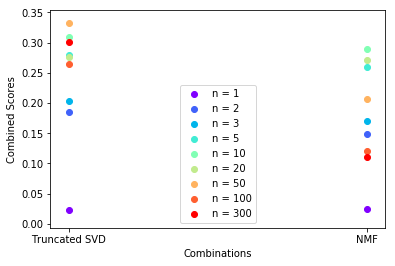

In [40]:
# Plot combined scores
display(combined_scores)
x = np.arange(2)
ys = combined_scores

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for k, c in zip(ys, colors):
    plt.scatter(x, k, color=c, marker="o")

plt.legend(['n = 1', 'n = 2', 'n = 3', 'n = 5', 'n = 10', 'n = 20', 'n = 50', 'n = 100', 'n = 300'], loc=0)
plt.xticks(np.arange(2), ['Truncated SVD', 'NMF'])
plt.xlabel('Combinations')
plt.ylabel('Combined Scores')
plt.show()

Best r for Truncated SVD = 50: 
Combination 1: SVD
Homogeneity:  0.337349921205238
Completeness:  0.49282858414544073
V-measure:  0.40052996544140773
adjusted Rand Index:  0.09513006394013136
adjusted mutual information score:  0.33517763781494136
Combination 2: SVD + Unit Variance
Homogeneity:  0.1941393960596851
Completeness:  0.31977823666572525
V-measure:  0.2416011819251415
adjusted Rand Index:  0.0467628674852913
adjusted mutual information score:  0.19147115673818785
Combination 3: SVD + Log Trans
Homogeneity:  0.3961958245363309
Completeness:  0.4211987057788176
V-measure:  0.40831486470880635
adjusted Rand Index:  0.1966888496743482
adjusted mutual information score:  0.3942446929202669
Combination 4: SVD + Unit Variance + Log Trans
Homogeneity:  0.3411275018622115
Completeness:  0.35232477433064824
V-measure:  0.34663573612138643
adjusted Rand Index:  0.18851342199480414
adjusted mutual information score:  0.3390000122063957
Combination 5: SVD + Log Trans + Unit Variance
Homo

[0.33220323450943184,
 0.1987505677748062,
 0.363328587523714,
 0.3135202893030892,
 0.3418883987486837,
 0.28943285277240177,
 0.27801698905810907,
 0.344136946642292,
 0.28932538374270733,
 0.3478502757080141]

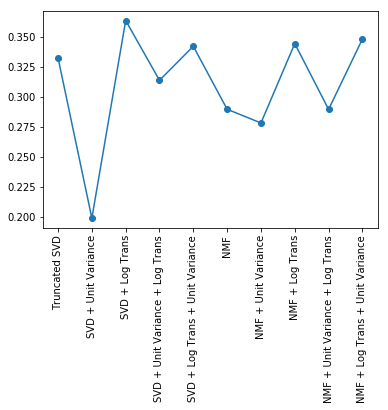

In [41]:
# Next, we test for different transformation combinations for best_r_SVD and best_r_NMF

combined_scores = [0 for j in range(10)]

# SVD transformation
best_r_SVD = 50
best_r_NMF = 10

svd =  TruncatedSVD(n_components = best_r_SVD, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
nmf =  NMF(n_components = best_r_NMF, random_state=42)
X_nmf = nmf.fit_transform(X_tfidf)
X_svd_scaled = preprocessing.scale(X_svd)
X_nmf_scaled = preprocessing.scale(X_nmf)
X_svd_log = log_trans(X_svd)
X_nmf_log = log_trans(X_nmf)

# comb 1, SVD
y_pred_svd_1 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_svd)
# comb 2, SVD + unit var
y_pred_svd_2 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_svd_scaled)
# comb 3, SVD + log
y_pred_svd_3 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_svd_log)
# comb 4, SVD + unit var + log
y_pred_svd_4 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(log_trans(X_svd_scaled))
# comb 5, SVD + log + unit var
y_pred_svd_5 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(preprocessing.scale(X_svd_log))

# comb 6, NMF
y_pred_nmf_1 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_nmf)
# comb 7, NMF + unit var
y_pred_nmf_2 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_nmf_scaled)
# comb 8, NMF + log
y_pred_nmf_3 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_nmf_log)
# comb 9, NMF + unit var + log
y_pred_nmf_4 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(log_trans(X_nmf_scaled))
# comb 10, NMF + log + unit var
y_pred_nmf_5 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(preprocessing.scale(X_nmf_log))

# Print scores
print("Best r for Truncated SVD = %d: " % best_r_SVD)
print("Combination 1: SVD")
print_score(dataset.target, y_pred_svd_1)
print("Combination 2: SVD + Unit Variance")
print_score(dataset.target, y_pred_svd_2)
print("Combination 3: SVD + Log Trans")
print_score(dataset.target, y_pred_svd_3)
print("Combination 4: SVD + Unit Variance + Log Trans")
print_score(dataset.target, y_pred_svd_4)
print("Combination 5: SVD + Log Trans + Unit Variance")
print_score(dataset.target, y_pred_svd_5)
print()

print("Best r for Truncated NMF = %d: " % best_r_NMF)
print("Combination 5: NMF")
print_score(dataset.target, y_pred_nmf_1)
print("Combination 6:  NMF + Unit Variance")
print_score(dataset.target, y_pred_nmf_2)
print("Combination 7: NMF + Log Trans")
print_score(dataset.target, y_pred_nmf_3)
print("Combination 8: NMF + Unit Variance + Log Trans")
print_score(dataset.target, y_pred_nmf_4)
print("Combination 10: NMF + Log Trans + Unit Variance")
print_score(dataset.target, y_pred_nmf_5)

# Compute a combined score with equal weights
combined_scores[0] = compute_scores(dataset.target, y_pred_svd_1)
combined_scores[1] = compute_scores(dataset.target, y_pred_svd_2)
combined_scores[2] = compute_scores(dataset.target, y_pred_svd_3)
combined_scores[3] = compute_scores(dataset.target, y_pred_svd_4)
combined_scores[4] = compute_scores(dataset.target, y_pred_svd_5)

combined_scores[5] = compute_scores(dataset.target, y_pred_nmf_1)
combined_scores[6] = compute_scores(dataset.target, y_pred_nmf_2)
combined_scores[7] = compute_scores(dataset.target, y_pred_nmf_3)
combined_scores[8] = compute_scores(dataset.target, y_pred_nmf_4)
combined_scores[9] = compute_scores(dataset.target, y_pred_nmf_5)
    
# Plot combined scores
display(combined_scores)
x = np.arange(10)
plt.plot(x, combined_scores, marker="o")
plt.xticks(np.arange(10), ['Truncated SVD', 'SVD + Unit Variance', 'SVD + Log Trans', 'SVD + Unit Variance + Log Trans', 'SVD + Log Trans + Unit Variance', 'NMF','NMF + Unit Variance', 'NMF + Log Trans', 'NMF + Unit Variance + Log Trans', 'NMF + Log Trans + Unit Variance'], rotation = 90)
plt.show()

In summary, we first used truncated SVD and NMF for dimensions in n = {1,2,3,5,10,20,50,100,300} to find the best n for the 20-class classification problem. We generated a "combined score", which is the mean of the five scores (homogeneity, completeness, V_measure, adjusted rand, and adjusted mutual information), to gain an overview and quantitatively measure the performance for each case. We found that for truncated SVD, the best n is 50, where as for NMF, the best n is 10 (Fig. 1). Then, for each best n of truncated SVD and NMF, we test for different combinations of transformation techniques to find the best one (Fig. 2). We found that truncated SVD with dimension 50 and logarithm transformation gives the best performance. 